In [2]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=d042282eabd5b21c17e762809d88da0d4ef0d9c3030c20d1a5785962294b4c8f
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [3]:
#import python libraries for data manipulation and visualization
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

# Success metrics for the models
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix,f1_score,roc_curve,roc_auc_score
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train

#Algorithms for using supervised learning methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Feature Importance-Explainable AI Libraries
# import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

import warnings # filtering the future warnings
warnings.filterwarnings('ignore')

sns.set()

### Creating DataFrame & Data Understanding

In [5]:
#Reading Data
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [ ]:
df.info()

In [8]:
df.describe().T # Concise statistical description of numeric features


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Preprocessing - Feature Engineering - Exploratory Data Analysis


In [9]:
df.isnull().values.any() # No missing values to deal with

False

In [10]:
df.duplicated().any() # There is no duplicated features to be dropped or deal with.

False

### Correlation Matrix For Numeric Features

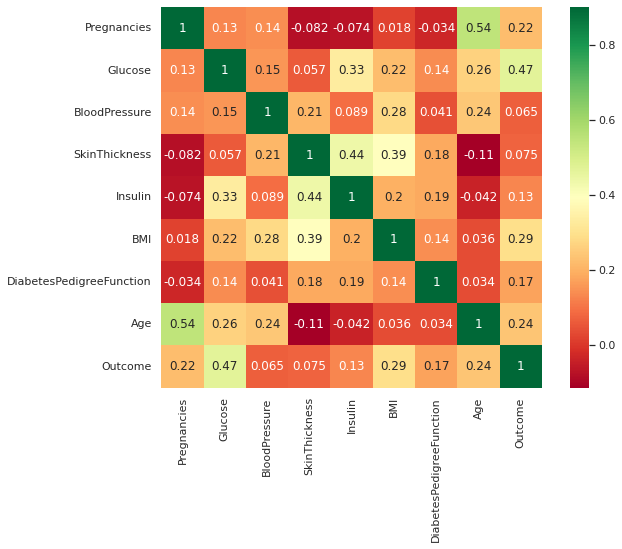

In [11]:
corrmat = df.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(corrmat, annot=True, vmax=0.9, square=True,cmap='RdYlGn')
plt.show();

#### Distrubution Plots for Numeric Features¶
- Distribution of numeric features are different from each other. Some of the features normally distributed (e.g 'Glucose' and 'BMI') whereas some have skewed distributions.


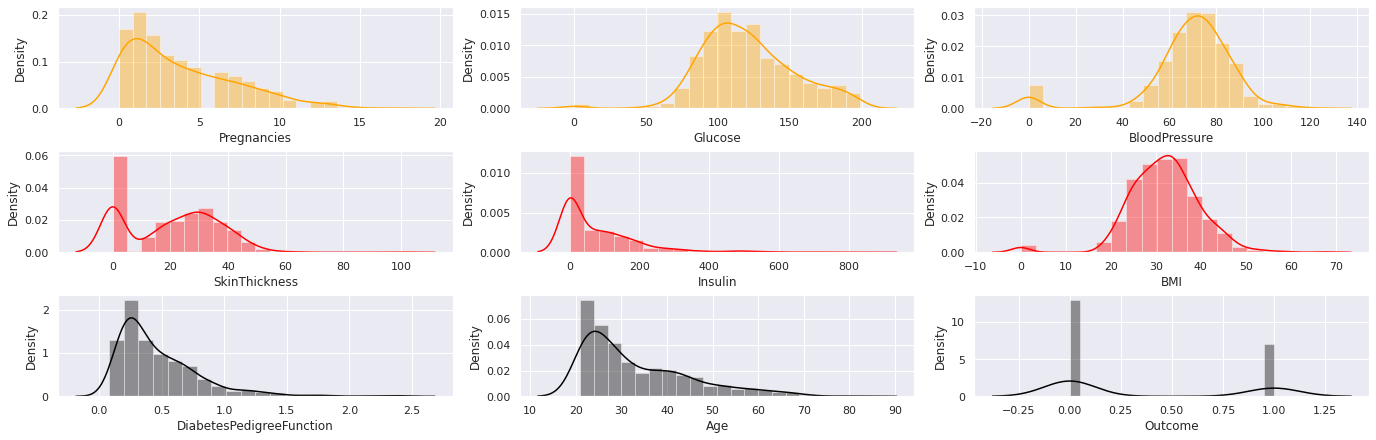

In [12]:
f,ax=plt.subplots(3,3,figsize=(19,6),constrained_layout = True)
sns.distplot(df["Pregnancies"],bins=20,ax=ax[0,0],color='orange');

sns.distplot(df["Glucose"],bins=20,ax=ax[0,1],color='orange');

sns.distplot(df["BloodPressure"],bins=20,ax=ax[0,2],color='orange');

sns.distplot(df["SkinThickness"],bins=20,ax=ax[1,0],color='red');

sns.distplot(df["Insulin"],bins=20,ax=ax[1,1],color='red');

sns.distplot(df["BMI"],bins=20,ax=ax[1,2],color='red');

sns.distplot(df["DiabetesPedigreeFunction"],bins=20,ax=ax[2,0],color='black');

sns.distplot(df["Age"],bins=20,ax=ax[2,1],color='black');

sns.distplot(df["Outcome"],bins=20,ax=ax[2,2],color='black');

#### Analysis of 'Outcome' Feature

0    500
1    268
Name: Outcome, dtype: int64


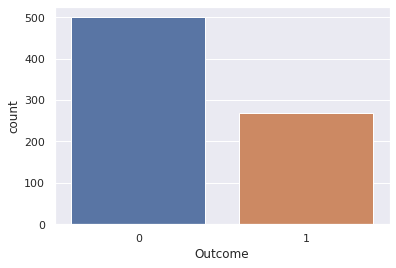

In [13]:
sns.countplot(data=df, x='Outcome');
print(df.Outcome.value_counts())

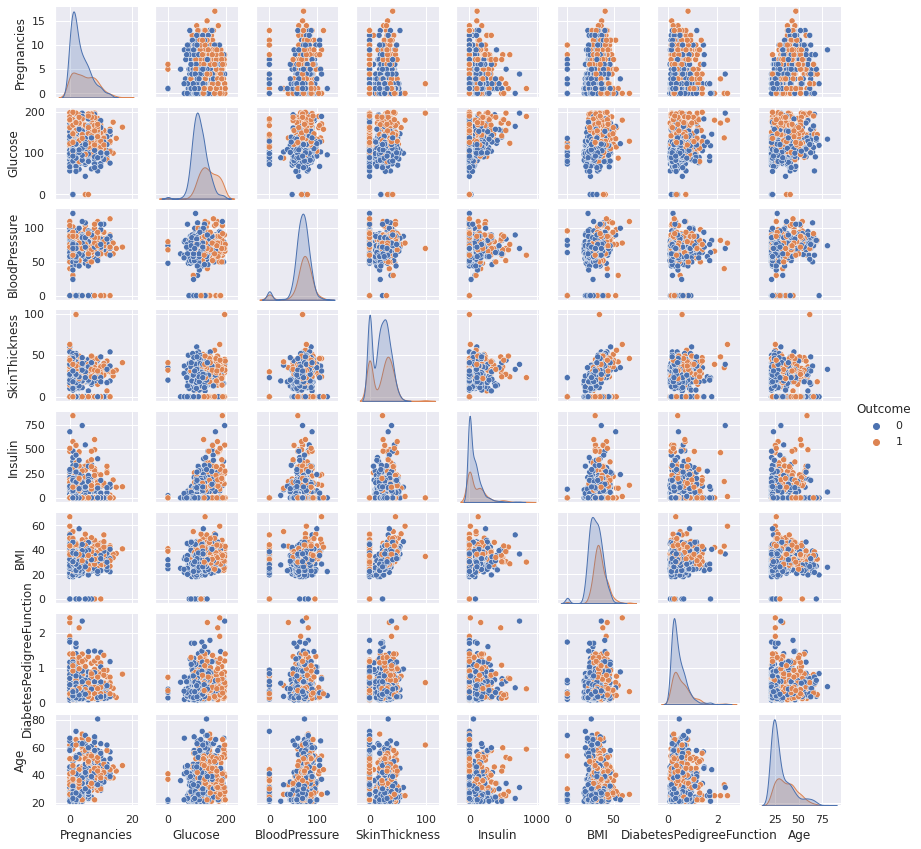

In [14]:
sns.pairplot(df, hue="Outcome",height=1.5);
plt.show();

#### Applying Normalization
- Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.
- In our example, Min-Max Scaling technique is applied.


In [15]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

columns_to_be_scaled = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                        'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
for i in columns_to_be_scaled:
    df[i] = scaling(i)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


### Machine Learning Modeling
#### Train - Test Split
- Train dataset is split into test-train parts to be able to use in ML algorithms.
- 70% for training and 30% for testing


In [17]:
y=df["Outcome"] #output column
X=df.drop(["Outcome"],axis=1) #train columns
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

#### 1-KNN Classifier
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

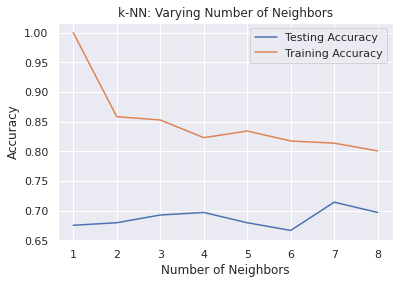

In [18]:
#KNN
# The following code creates 9 models for each K value from 1 to 9 and show the training and testing accuracies for each K.
# From the figure, we need to choose K value which is not too high and have the highest accuracies for testing and training sets
# When K gets higher, the model gets more complicated and requires more computational power and time.
# 3 or 7 looks good from the figure below according to the accuracies.

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

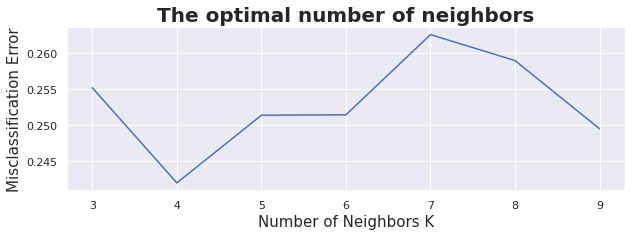

In [19]:
# The code will create models by trying K values from 1 to 20 by using Cross Validation method.
# When the K increases, misclassification error reduces,however, we need to choose the elbow point as K value.
# In the following figure, K can be chosen as 3.
# Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
# CV is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.
# That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to
# make predictions on data not used during the training of the model.

k_list = list(range(3,10))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(10,3))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE);

plt.show()

In [20]:
knn =KNeighborsClassifier(n_neighbors=3) #K=3
knn_model = knn.fit(X_train,y_train) # Creating the model
y_pred_knn = knn.predict(X_test) # Calculating the predictions using the model

In [21]:
print("**************** KNN MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_knn),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_knn),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_knn),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_knn),5))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

**************** KNN MODEL RESULTS **************** 
Accuracy score for testing set:  0.69264
F1 score for testing set:  0.53595
Recall score for testing set:  0.5125
Precision score for testing set:  0.56164
[[119  32]
 [ 39  41]]


#### 2- Random Forest Classifier
- Random forest is an ensemble machine learning algorithm.
- A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [22]:
rf_model_final = RandomForestClassifier() # Object creation
rf_model_final.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_rf = rf_model_final.predict(X_test) # Getting the predictions

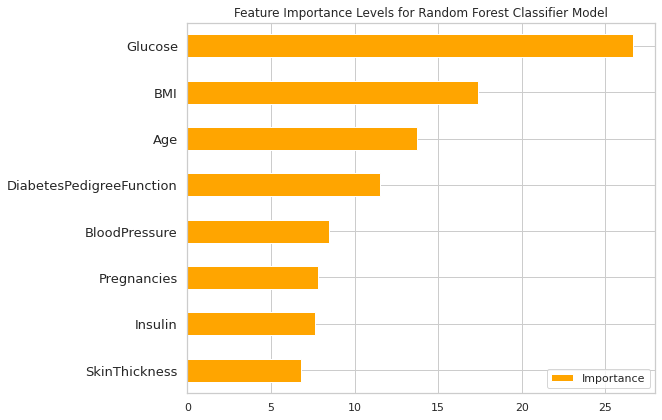

In [23]:
Importance =pd.DataFrame({"Importance": rf_model_final.feature_importances_*100},index=X.columns)
Importance.nlargest(n=10,columns="Importance").sort_values(by = "Importance", axis = 0, ascending = True).plot(kind ="barh",figsize=(9, 6),color="orange")
plt.title("Feature Importance Levels for Random Forest Classifier Model");
plt.tight_layout()
plt.yticks(fontsize=13)
plt.show()

In [24]:
print("**************** RANDOM FOREST MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_rf),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_rf),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_rf),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_rf),5))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

**************** RANDOM FOREST MODEL RESULTS **************** 
Accuracy score for testing set:  0.73593
F1 score for testing set:  0.61635
Recall score for testing set:  0.6125
Precision score for testing set:  0.62025
[[121  30]
 [ 31  49]]


#### 3 - Logistic Regression Classifier¶
Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1


In [25]:
log_reg = LogisticRegression() # L1 regularization method is defined
log_model = log_reg.fit(X_train,y_train) # Creating the model
y_pred_log_reg = log_model.predict(X_test) # Calculating the predictions using the model

In [26]:
print("**************** LOGISTIC REGRESSION MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_log_reg),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_log_reg),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_log_reg),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_log_reg),5))
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
print(cm_lr)

**************** LOGISTIC REGRESSION MODEL RESULTS **************** 
Accuracy score for testing set:  0.74459
F1 score for testing set:  0.60403
Recall score for testing set:  0.5625
Precision score for testing set:  0.65217
[[127  24]
 [ 35  45]]


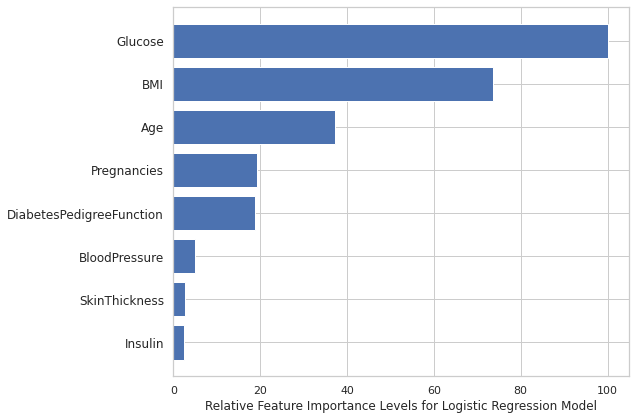

In [27]:
# Feature Importances
feature_importance = abs(log_model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(9, 6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance Levels for Logistic Regression Model')

plt.tight_layout()
plt.show()

## Model Comparisons
#### Accuracy Score (10-fold cross-validated)¶

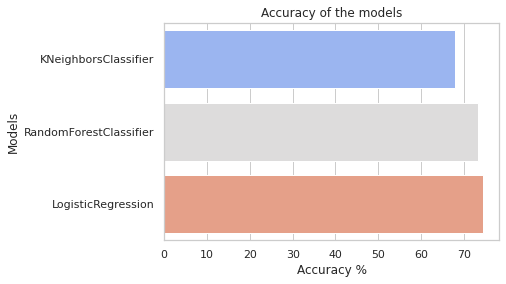

In [28]:
models = [knn_model,rf_model_final,log_model]

result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model,X_test,y_test,cv=10,scoring="accuracy").mean()
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)

sns.barplot(x= 'Accuracy', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models');

#LogisticRegression has performed the best for the given dataset (74.45%)
#RandomForestClassifier has performed the second best for the given dataset (71.06%)
#KNeighborsClassifier has performed the third for the given dataset (68.0%)


In [29]:
results.sort_values(by="Accuracy",ascending=False)


,Models,Accuracy
0,LogisticRegression,74.456522
0,RandomForestClassifier,73.206522
0,KNeighborsClassifier,68.007246


#### F1 Score (10-fold cross-validated)

Text(0.5, 1.0, 'F1 of the models')

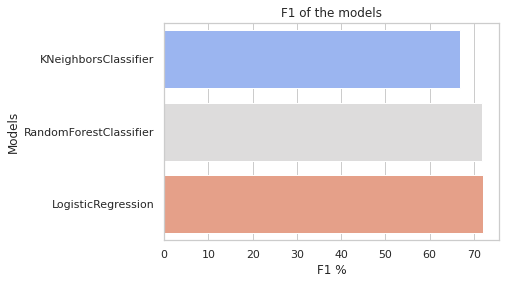

In [30]:
models = [knn_model,rf_model_final,log_model]

result = []
results = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,y_test,cv=10,scoring="f1_weighted").mean()
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results = results.append(result)

sns.barplot(x= 'F1', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 of the models')

#LogisticRegression has performed the best for the given dataset (72.06%)
#RandomForestClassifier has performed the second best for the given dataset (72.04%)
#KNeighborsClassifier has performed the third for the given dataset (66.75%)

In [31]:
results.sort_values(by="F1",ascending=False)

,Models,F1
0,LogisticRegression,72.047765
0,RandomForestClassifier,71.877052
0,KNeighborsClassifier,66.750079


#### ROC Curve

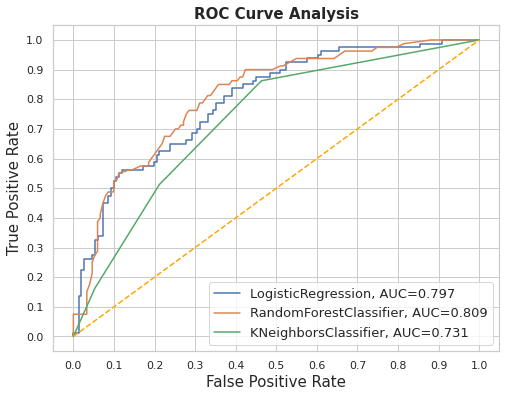

In [32]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               KNeighborsClassifier(n_neighbors=3)]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Permutation Importance and Feature Importance for Logistic Regression Model
Feature permutation importance is a model-agnostic global explanation method that provides insights into a machine learning model's behavior. It estimates and ranks feature importance based on the impact each feature has on the trained machine learning model's predictions.

In [33]:
perm = PermutationImportance(log_model, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

Weight,Feature
0.1166 ± 0.0403,Glucose
0.0216 ± 0.0180,BMI
0.0011 ± 0.0018,Insulin
0.0000 ± 0.0118,Age
0.0000 ± 0.0047,DiabetesPedigreeFunction
-0.0015 ± 0.0015,SkinThickness
-0.0026 ± 0.0018,BloodPressure
-0.0086 ± 0.0099,Pregnancies


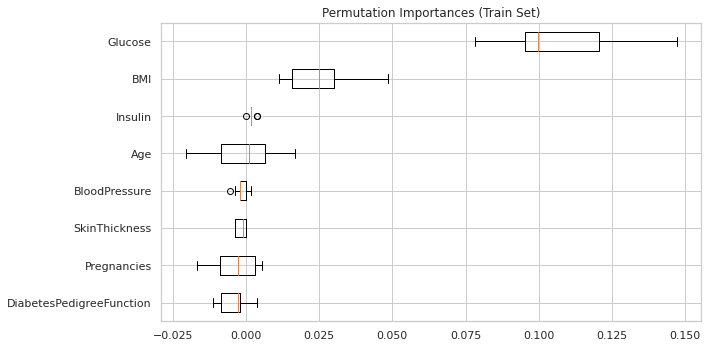

In [34]:
result = permutation_importance(log_model, X_train.iloc[:,0:], y_train, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(result.importances[sorted_idx].T,vert=False, labels=X_train.iloc[:,0:].columns[sorted_idx])
ax.set_title("Permutation Importances (Train Set)")
fig.tight_layout()
plt.show()

#### Hyperparameter Tuning of Logistic Regression Classifier
#### 3-Fold Cross validated GridSearchCV hyperparameter tuning technique is used.

In [35]:
lr_params={"C":np.logspace(1,100,7),
      "penalty":["l1","l2","elasticnet"],
      "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg=LogisticRegression()
logreg_cv=GridSearchCV(log_reg, lr_params, cv=3).fit(X_train,y_train)
print("Best parameters:"+str(logreg_cv.best_params_))

Best parameters:{'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [36]:
log_reg = LogisticRegression(C=10,penalty='l2',solver='newton-cg') # L2 regularization method is defined
log_model = log_reg.fit(X_train,y_train) # Creating the model
y_pred_log_reg = log_model.predict(X_test) # Calculating the predictions using the model

### Neural Networks
We Still want to improve the model's performance. Lets apply some deep learning models to get better accuracy.

In [39]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
X_train.shape[1]

8

In [44]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1152      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [46]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=4)

Epoch 1/50
135/135 [==============================] - 1s 4ms/step - loss: 0.6257 - accuracy: 0.6592 - val_loss: 0.6118 - val_accuracy: 0.6580
Epoch 2/50
135/135 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.6704 - val_loss: 0.5977 - val_accuracy: 0.6753
Epoch 3/50
135/135 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.6946 - val_loss: 0.5803 - val_accuracy: 0.6797
Epoch 4/50
135/135 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.7132 - val_loss: 0.5695 - val_accuracy: 0.6926
Epoch 5/50
135/135 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7132 - val_loss: 0.5568 - val_accuracy: 0.6970
Epoch 6/50
135/135 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.7300 - val_loss: 0.5628 - val_accuracy: 0.6926
Epoch 7/50
135/135 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.7430 - val_loss: 0.5453 - val_accuracy: 0.6970
Epoch 

[]

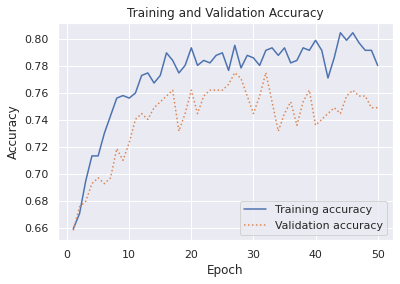

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

8/8 [==============================] - 0s 3ms/step


Text(89.18, 0.5, 'Actual label')

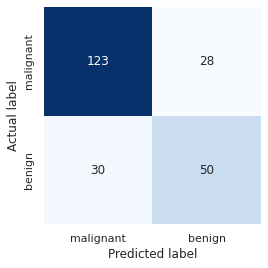

In [48]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [37]:
print("**************** TUNED LOGISTIC REGRESSION MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred_log_reg),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_pred_log_reg),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_pred_log_reg),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_log_reg),5))
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
print(cm_lr)

**************** TUNED LOGISTIC REGRESSION MODEL RESULTS **************** 
Accuracy score for testing set:  0.7316
F1 score for testing set:  0.60759
Recall score for testing set:  0.6
Precision score for testing set:  0.61538
[[121  30]
 [ 32  48]]


In [51]:
print("**************** NN MODEL RESULTS **************** ")
print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_predicted),5))
print('F1 score for testing set: ',round(f1_score(y_test,y_predicted),5))
print('Recall score for testing set: ',round(recall_score(y_test,y_predicted),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_predicted),5))
cm_lr2 = confusion_matrix(y_test, y_predicted)
print(cm_lr2)

**************** NN MODEL RESULTS **************** 
Accuracy score for testing set:  0.74892
F1 score for testing set:  0.63291
Recall score for testing set:  0.625
Precision score for testing set:  0.64103
[[123  28]
 [ 30  50]]
